<a href="https://colab.research.google.com/github/newguy7/DataScienceProjects/blob/main/titanic_spaceship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [280]:
# Task:to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly.
# predict which passengers were transported by the anomaly
import pandas as pd
import numpy as np

# load the dataset

df = pd.read_csv('titanic_spaceship_train.csv')
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")


The dataset has 8693 rows and 14 columns.


In [281]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [282]:
# find the unwanted observations
# print(df.head())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


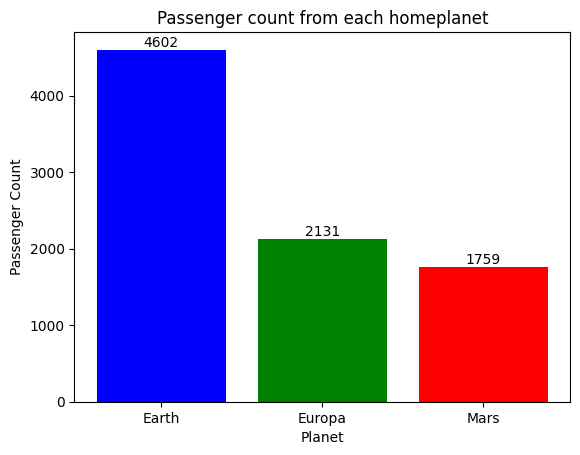

In [283]:
import matplotlib.pyplot as plt

# Passenger count from each homeplanet
total_passenger = df.HomePlanet.value_counts()

# earth_passenger = total_passenger['Earth']
# europa_passenger = total_passenger['Europa']
# mars_passenger = total_passenger['Mars']

# bar chart showing passengers from each planet
plt.bar(total_passenger.index,total_passenger.values,color=['blue','green','red'])
# show value of each bar
for index, value in enumerate(total_passenger.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel('Planet')
plt.ylabel('Passenger Count')
plt.title('Passenger count from each homeplanet')
plt.show()

In [284]:
# number of passengers who elected to be put into suspended animation for the duration of the voyage.
cryo_sleep = df.CryoSleep.value_counts()

yes_cryosleep = cryo_sleep.values[0]
no_cryosleep = cryo_sleep.values[1]
print(f"{yes_cryosleep} passengers elected to be put into suspended animation for the duration of the voyage.")
print(f"{no_cryosleep} passengers did not elect to be put into suspended animation for the duration of the voyage.")

5439 passengers elected to be put into suspended animation for the duration of the voyage.
3037 passengers did not elect to be put into suspended animation for the duration of the voyage.


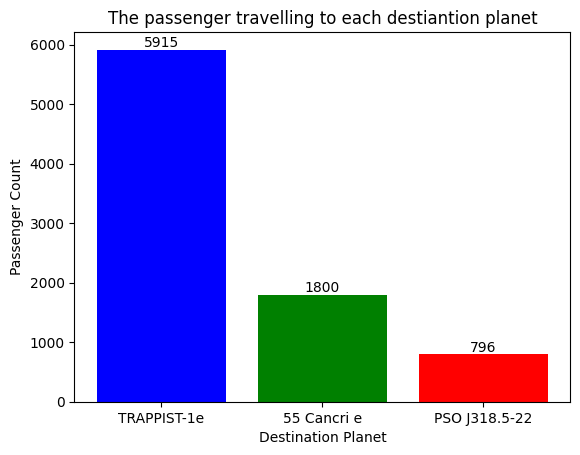

In [285]:
# Destination of the passengers
df_passenger = df.Destination.value_counts()
df_passenger.index[0]

# bar chart showing passengers from each planet
plt.bar(df_passenger.index,df_passenger.values,color=['blue','green','red'])
# show value of each bar
for index, value in enumerate(df_passenger.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel('Destination Planet')
plt.ylabel('Passenger Count')
plt.title('The passenger travelling to each destiantion planet')
plt.show()

In [286]:
# Average, minimum and maximum age of the passengers
age_stats = df.groupby('HomePlanet')['Age'].agg(['max','min','mean'])
age_stats

,max,min,mean
HomePlanet,,,
Earth,79.0,0.0,26.068232
Europa,79.0,0.0,34.419664
Mars,76.0,0.0,29.297203


In [287]:
# Total Vip and non-vip passengers
vip_stats = df[df.VIP==True]
vip = vip_stats['HomePlanet'].value_counts()
print("Vip passengers from each planet")
print(vip)

non_vip_stats = df[df.VIP==False]
non_vip = non_vip_stats['HomePlanet'].value_counts()
print("Non-Vip passengers from each planet")
print(non_vip)

Vip passengers from each planet
Europa    131
Mars       63
Name: HomePlanet, dtype: int64
Non-Vip passengers from each planet
Earth     4487
Europa    1958
Mars      1653
Name: HomePlanet, dtype: int64


In [288]:
# Managing unwanted observations
# unwanted columns: Cabin
clean_df = df.drop(['Cabin','Name'],axis=1)
print(clean_df.head())

  PassengerId HomePlanet CryoSleep  Destination   Age    VIP  RoomService  \
0     0001_01     Europa     False  TRAPPIST-1e  39.0  False          0.0   
1     0002_01      Earth     False  TRAPPIST-1e  24.0  False        109.0   
2     0003_01     Europa     False  TRAPPIST-1e  58.0   True         43.0   
3     0003_02     Europa     False  TRAPPIST-1e  33.0  False          0.0   
4     0004_01      Earth     False  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
0        0.0           0.0     0.0     0.0        False  
1        9.0          25.0   549.0    44.0         True  
2     3576.0           0.0  6715.0    49.0        False  
3     1283.0         371.0  3329.0   193.0        False  
4       70.0         151.0   565.0     2.0         True  


In [289]:
# check for nan values
print(clean_df.shape)
clean_df.isna().sum()

(8693, 12)


PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [290]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


In [291]:
# Categorical and Numerical Columns
string_cols= clean_df.loc[:,df.dtypes==object].columns

numerical_cols = clean_df.loc[:,df.dtypes==float].columns

print(string_cols)
print(numerical_cols)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'VIP'], dtype='object')
Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')


In [292]:
# Handling Missing data
from sklearn.impute import SimpleImputer

# filling the columns with nan values
# For numerical columns using strategy = mean
num_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on the numerical columns
num_mean.fit(clean_df[numerical_cols])

# Transform and replace the missing values in the numerical columns
clean_df[numerical_cols] = num_mean.transform(clean_df[numerical_cols])

In [293]:
# For categorical columns using strategy = 'most_frequent'
string_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Fit the imputer on the string columns
string_mean.fit(clean_df[string_cols])

# Transform and replace the missing values in the string columns
clean_df[string_cols] = string_mean.transform(clean_df[string_cols])

In [294]:
# Verify all the nan values have been filled
print(clean_df.isna().sum())

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64


In [295]:
clean_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [296]:
# Label Data
Y = clean_df['Transported']

# Features data
X = clean_df.drop('Transported',axis=1)

In [297]:
# Seperating features into numerical and categorical
categorical_X = X.loc[:,df.dtypes==object]
num_X = X.loc[:,df.dtypes!=object]

In [298]:
# Data Formatting/Scaling
from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler = StandardScaler()
scaler.fit(num_X)
print(scaler.mean_)

numerical_features = scaler.transform(num_X)



[ 28.82793047 224.68761748 458.07720329 173.72916912 311.13877791
 304.8547913 ]


In [299]:
# One hot encoding for categorical features
# categorical_features = categorical_X.astype(str)

# Create instance of one hot encoder
encoder = OneHotEncoder()
encoder.fit(categorical_X)
print(encoder.categories_)

categorical_features = encoder.transform(categorical_X).toarray()

# Concatenate both numerical and categorical features
features_X = np.concatenate([numerical_features,categorical_features],axis=1)


[array(['0001_01', '0002_01', '0003_01', ..., '9279_01', '9280_01',
       '9280_02'], dtype=object), array(['Earth', 'Europa', 'Mars'], dtype=object), array([False, True], dtype=object), array(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e'], dtype=object), array([False, True], dtype=object)]


In [300]:
# One hot encoding for label
label_encoded = []

for k in Y:
  if k == True:
    label_encoded.append(1)
  elif k == False:
    label_encoded.append(0)

label_array = np.array(label_encoded).reshape(-1,1)

encoder.fit(label_array)
print(encoder.categories_)
encoded_array = encoder.transform(label_array).toarray()

[array([0, 1])]


In [301]:
# Split train and test data
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(features_X,encoded_array,test_size=0.2)

In [302]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

predict_lbls = knn.predict(X_test)
print(predict_lbls[0])
print(Y_test[0])

# Convert arrays to lists for comparison
y_pred_list = predict_lbls.tolist()
y_test_list = Y_test.tolist()

accuracy_knn = 0
for k in range(len(predict_lbls)):
  if y_pred_list[k] == y_test_list[k]:
    accuracy_knn += 1
accuracy_knn = round(accuracy_knn/len(predict_lbls)*100,2)
print(f"The accuracy of the KNN Model is {accuracy_knn}%")

[1. 0.]
[0. 1.]
The accuracy of the KNN Model is 76.08%


In [305]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train,Y_train)

predict_lbls = decision_tree.predict(X_test)
print(predict_lbls[0])
print(Y_test[0])

# Convert arrays to lists for comparison
y_pred_list = predict_lbls.tolist()
y_test_list = Y_test.tolist()

accuracy_dec_tree = 0
for k in range(len(predict_lbls)):
  if y_pred_list[k] == y_test_list[k]:
    accuracy_dec_tree += 1
accuracy_dec_tree = round(accuracy_dec_tree/len(predict_lbls)*100,2)
print(f"The accuracy of the Decision Tree Model is {accuracy_dec_tree}%")

[0. 1.]
[0. 1.]
The accuracy of the Decision Tree Model is 76.54%


In [306]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

ran_for = RandomForestClassifier()
ran_for.fit(X_train, Y_train)

pred_lbls = ran_for.predict(X_test)

# Convert arrays to lists for comparison
y_pred_list = pred_lbls.tolist()
y_test_list = Y_test.tolist()

accuracy_ran_for = 0
for k in range(len(pred_lbls)):
  if y_pred_list[k] == y_test_list[k]:
    accuracy_ran_for += 1
accuracy_ran_for = round(accuracy_ran_for/len(pred_lbls)*100,2)
print(f"The accuracy of the Random Forest Model is {accuracy_ran_for}%")

The accuracy of the Random Forest Model is 79.82%
